myProject_Heart DataSet
Hesam Hosseini

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
from matplotlib.patches import ConnectionPatch
import matplotlib.patheffects as path_effects
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches  
from scipy.interpolate import make_interp_spline 
from pathlib import Path

In [ ]:
data_path = Path(__file__).parent / 'heart.csv'
data = pd.read_csv(data_path)
df=pd.DataFrame(data)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [802]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [803]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [804]:
pd.unique(df[["age"]].values.ravel())

array([63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 58, 50, 66, 43, 69, 59,
       42, 61, 40, 71, 51, 65, 53, 46, 45, 39, 47, 62, 34, 35, 29, 55, 60,
       67, 68, 74, 76, 70, 38, 77], dtype=int64)

In [805]:
df[["age"]].mean()

age    54.366337
dtype: float64

In [806]:
pd.unique(df[["sex"]].values.ravel())

array([1, 0], dtype=int64)

Gender of the patient (1 = male, 0 = female) 

In [808]:
pd.unique(df[["cp"]].values.ravel())

array([3, 2, 1, 0], dtype=int64)

cp: Chest pain type==> 

Value 0: asymptomatic
Value 1: atypical angina
Value 2: non-anginal pain
Value 3: typical angina

In [810]:
pd.unique(df[["trestbps"]].values.ravel())

array([145, 130, 120, 140, 172, 150, 110, 135, 160, 105, 125, 142, 155,
       104, 138, 128, 108, 134, 122, 115, 118, 100, 124,  94, 112, 102,
       152, 101, 132, 148, 178, 129, 180, 136, 126, 106, 156, 170, 146,
       117, 200, 165, 174, 192, 144, 123, 154, 114, 164], dtype=int64)

In [811]:
df[["trestbps"]].mean()

trestbps    131.623762
dtype: float64

trestbps ==>
Resting blood pressure in mm Hg

In [813]:
pd.unique(df[["chol"]].values.ravel())

array([233, 250, 204, 236, 354, 192, 294, 263, 199, 168, 239, 275, 266,
       211, 283, 219, 340, 226, 247, 234, 243, 302, 212, 175, 417, 197,
       198, 177, 273, 213, 304, 232, 269, 360, 308, 245, 208, 264, 321,
       325, 235, 257, 216, 256, 231, 141, 252, 201, 222, 260, 182, 303,
       265, 309, 186, 203, 183, 220, 209, 258, 227, 261, 221, 205, 240,
       318, 298, 564, 277, 214, 248, 255, 207, 223, 288, 160, 394, 315,
       246, 244, 270, 195, 196, 254, 126, 313, 262, 215, 193, 271, 268,
       267, 210, 295, 306, 178, 242, 180, 228, 149, 278, 253, 342, 157,
       286, 229, 284, 224, 206, 167, 230, 335, 276, 353, 225, 330, 290,
       172, 305, 188, 282, 185, 326, 274, 164, 307, 249, 341, 407, 217,
       174, 281, 289, 322, 299, 300, 293, 184, 409, 259, 200, 327, 237,
       218, 319, 166, 311, 169, 187, 176, 241, 131], dtype=int64)

chol ==>
Serum cholesterol in mg/dl

In [815]:
pd.unique(df[["fbs"]].values.ravel())

array([1, 0], dtype=int64)

fbs==>
Fasting blood sugar level, categorized as above 120 mg/dl (1 = true, 0 = false) 

In [817]:
pd.unique(df[["restecg"]].values.ravel())

array([0, 1, 2], dtype=int64)

restecg ==>
Resting electrocardiographic results: This represents the ECG results taken while the patient is at rest, before any exercise or stress testing.

Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria(LVH)
Value 1: normal
Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

In [819]:
pd.unique(df[["thalach"]].values.ravel())

array([150, 187, 172, 178, 163, 148, 153, 173, 162, 174, 160, 139, 171,
       144, 158, 114, 151, 161, 179, 137, 157, 123, 152, 168, 140, 188,
       125, 170, 165, 142, 180, 143, 182, 156, 115, 149, 146, 175, 186,
       185, 159, 130, 190, 132, 147, 154, 202, 166, 164, 184, 122, 169,
       138, 111, 145, 194, 131, 133, 155, 167, 192, 121,  96, 126, 105,
       181, 116, 108, 129, 120, 112, 128, 109, 113,  99, 177, 141, 136,
        97, 127, 103, 124,  88, 195, 106,  95, 117,  71, 118, 134,  90],
      dtype=int64)

thalach ==>
Maximum heart rate achieved during a stress test

In [821]:
pd.unique(df[["exang"]].values.ravel())

array([0, 1], dtype=int64)

exang ==>
Exercise-induced angina (1 = yes: the patient did experience angina during exercise
0 = no: the patient did not experience angina during exercise) 

💡 What is angina?
Angina is chest pain or discomfort caused by reduced blood flow to the heart.
It’s usually a symptom of coronary artery disease (CAD).
When it’s triggered by physical activity (like during a treadmill stress test), it’s called exercise-induced angina.

🫀 Why is exang important?
If a patient has exercise-induced angina, it suggests that:
The heart may not be getting enough oxygen when under stress
There could be blockages or narrowing in the coronary arteries

So -->
exang = 1 can be a red flag for heart disease
exang = 0 is generally a better sign (though not a guarantee of a healthy heart)

In [823]:
pd.unique(df[["oldpeak"]].values.ravel())

array([2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0. , 0.5, 1.6, 1.2, 0.2, 1.8,
       1. , 2.6, 1.5, 3. , 2.4, 0.1, 1.9, 4.2, 1.1, 2. , 0.7, 0.3, 0.9,
       3.6, 3.1, 3.2, 2.5, 2.2, 2.8, 3.4, 6.2, 4. , 5.6, 2.9, 2.1, 3.8,
       4.4])

oldpeak ==>
ST depression induced by exercise relative to rest.

🫀What is "ST depression"?
The ST segment is part of an ECG (electrocardiogram) reading, which measures the electrical activity of the heart.
ST depression means that this segment is lower than normal on the ECG graph.
It's often a sign of myocardial ischemia — meaning the heart muscle isn’t getting enough oxygen, typically due to narrowed coronary arteries.

🏃‍♂️ "Induced by exercise relative to rest"
This means they measure the ST segment:
When the patient is at rest
When the patient is exercising (usually on a treadmill or bike)
The difference (or depression) seen during exercise compared to rest is what's recorded as oldpeak.

📏 So what does the value represent?
It's a numerical value, e.g., 1.4, 2.3, etc.
It shows how much the ST segment dropped during exercise.
Higher values typically indicate more significant ischemia and may suggest a higher risk of heart disease.

🔍 In short:
oldpeak = Amount of ST depression during exercise compared to rest (in mm)
Higher oldpeak = More likely to have heart problems.


In [825]:
pd.unique(df[["slope"]].values.ravel())

array([0, 2, 1], dtype=int64)

Slope of the peak exercise ST segment==>
    
Value 0: downsloping
Value 1: flat
Value 2: upsloping

🫀what is "Slope of the peak exercise ST segment"?
🧾 Feature name: slope
It refers to the slope (direction/angle) of the ST segment right after peak exercise — basically, how the ST segment is behaving as the heart recovers from exertion.

📈 What are the possible values?
Usually, this variable is categorical with 3 possible values:


Value	Description	What it might suggest
Value 2: upsloping:	Normal response or less concern
Value 1: flat:	Possible ischemia
Value 0: downsloping	: More likely to be associated with disease

🫀 Why does this matter?
After exercise, a healthy heart often shows an upsloping ST segment as it recovers.
A flat or downsloping ST segment can indicate problems like coronary artery disease or ischemia, meaning the heart isn't getting enough oxygen.

🧠 Quick summary:
Slope of the peak exercise ST segment = Shape/direction of the ST segment after max exertion.
Helps doctors detect abnormal heart responses to stress/exercise

In [827]:
pd.unique(df[["ca"]].values.ravel())

array([0, 2, 1, 3, 4], dtype=int64)

ca==>
Number of major vessels (0-4) colored by fluoroscopy 

🧬 What does that mean?
"Major vessels" refers to the main coronary arteries supplying blood to the heart.
"Colored by fluoroscopy" means these vessels were visible under a special X-ray dye during a procedure like an angiogram or cardiac catheterization.

🩻 Fluoroscopy explained:
It's an imaging technique that lets doctors see blood flow in real time.
They inject a contrast dye into the blood, then observe how many major vessels are "seen" (i.e., properly filled with blood).

Value	Meaning-->

0	    All major vessels are clearly visible and open
1–3	    Some vessels show up — possibly due to partial blockages
4	    Either technical error or very limited visibility of all vessels
⚠️ Higher ca values often correlate with more severe heart disease.



In [829]:
pd.unique(df[["thal"]].values.ravel())

array([1, 2, 3, 0], dtype=int64)

thal ==>
Thalium stress test result: 
0: Normal 
1: Fixed defect 
2: Reversible defect 
3: Not described 

🧪 What is a Thallium Stress Test?
A nuclear imaging test where a radioactive tracer (like Thallium) is injected into the bloodstream.
Doctors observe how well blood flows to the heart muscle both at rest and after exercise.
It helps identify areas of the heart that may not be getting enough oxygen.

Value	Description	What it suggests
Value 0: NULL (dropped from the dataset previously)
Value 1: fixed defect (no blood flow in some part of the heart)
Value 2: normal blood flow
Value 3: reversible defect (a blood flow is observed but it is not normal)

In [831]:
pd.unique(df[["target"]].values.ravel())

array([1, 0], dtype=int64)

target==>
Heart disease status (1 = no disease, 0 = presence of disease)

In [833]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


🧠First Step: Accessing the relationship between Occurance of Blood Preassure and other factors like Age and Sex.

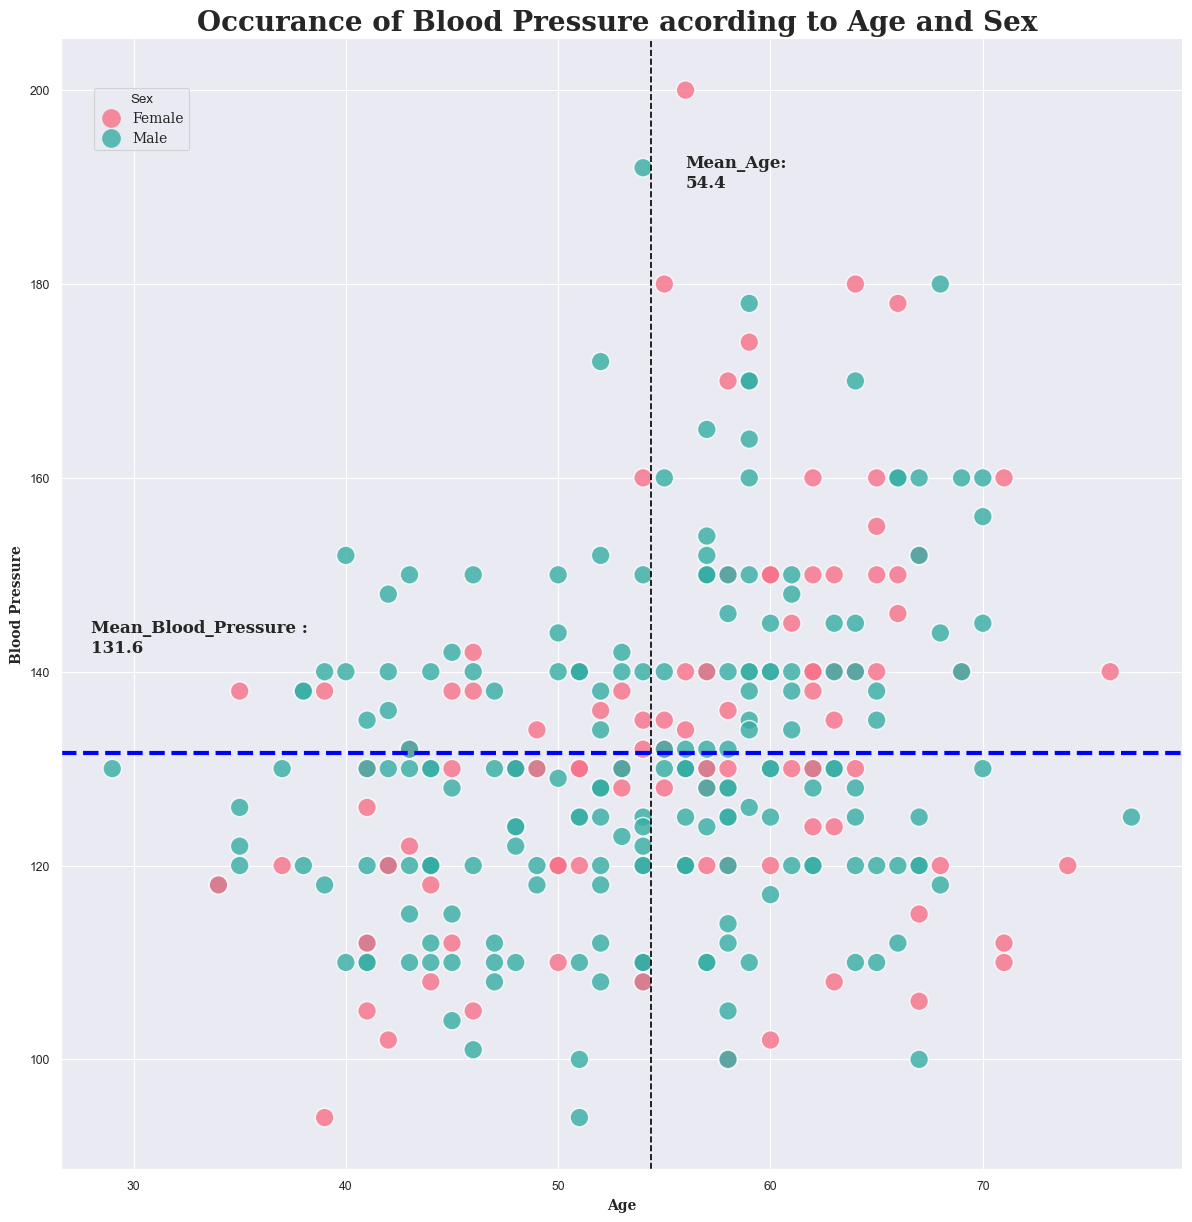

In [835]:
Mean_Blood_Pressure=df["trestbps"].mean()
Mean_Age=df["age"].mean()
p=sns.relplot(x="age",y="trestbps",data=df,hue="sex",alpha=0.8,palette="husl",height=12,s=180)
plt.title("Occurance of Blood Pressure acording to Age and Sex ",size=20,fontweight="bold",fontfamily="serif")

p._legend.set_title("Sex")
p._legend.set_frame_on(True)
p._legend.set_bbox_to_anchor((0.07,0.95))
p._legend.set_loc("upper left")
 
for text in p._legend.texts:
    text.set_fontsize(10)
    text.set_fontfamily("serif")
    new_labels=["Female","Male"]
    for t, label in zip(p._legend.texts, new_labels):
         t.set_text(label)
     
plt.xlabel("Age",fontsize=10,fontweight="bold",fontfamily="serif")
plt.ylabel("Blood Pressure",fontsize=10,fontweight="bold",fontfamily="serif")


plt.axvline(x=Mean_Age,color="black",linestyle='--')
plt.text(56,190,f"Mean_Age:\n{Mean_Age:0.1f}",fontsize=12,fontfamily="serif",fontweight="bold")

plt.axhline(y=Mean_Blood_Pressure,color="blue",lw=3,linestyle='--')
plt.text(28,142,f"Mean_Blood_Pressure :\n{Mean_Blood_Pressure:0.1f}",fontsize=12,fontfamily="serif",fontweight="bold")

plt.show()

🧠🧠Second Step: Correlation between ca & cp.

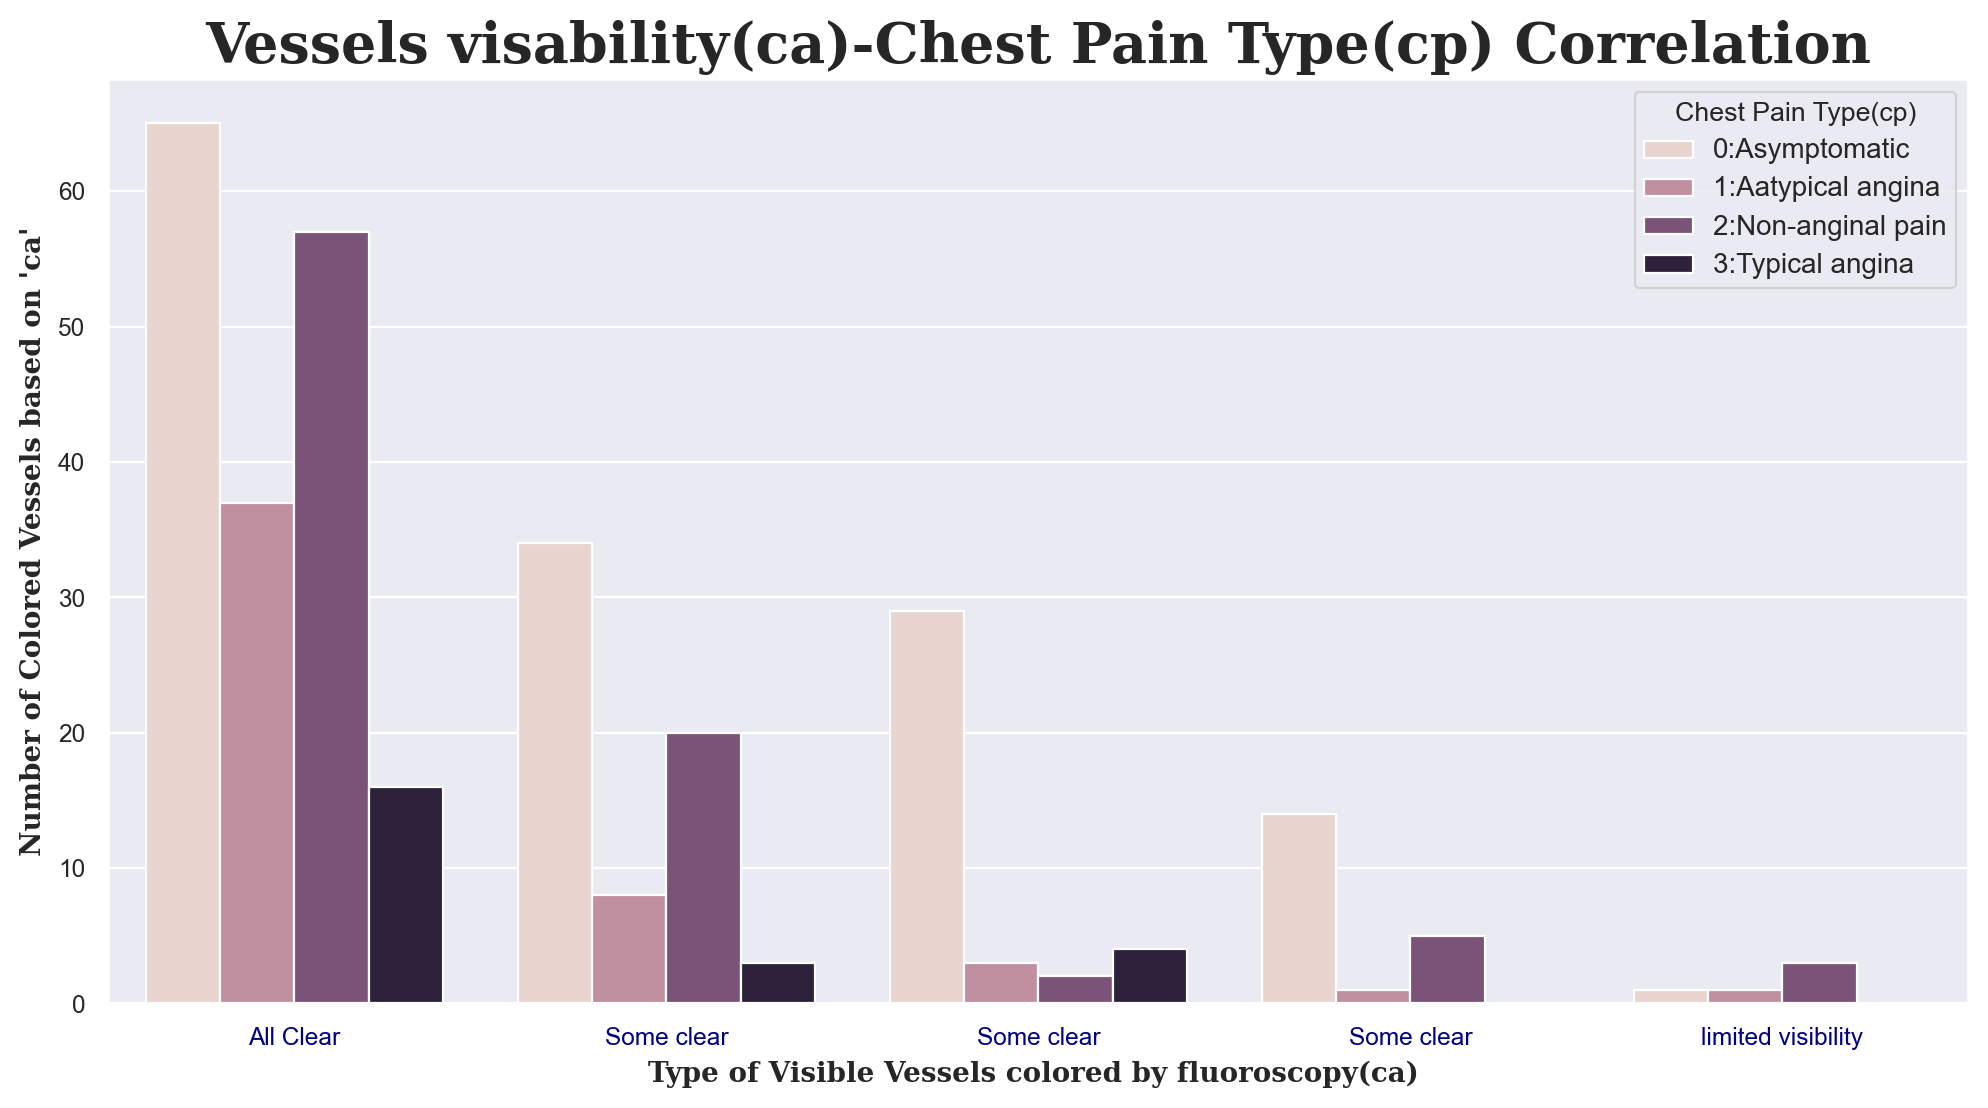

In [837]:
plt.figure(figsize=(12,6),dpi=200)
plot=sns.countplot(x="ca",hue="cp",data=df)

plt.xlabel("Type of Visible Vessels colored by fluoroscopy(ca) ",fontsize=10,fontweight="bold",fontfamily="serif")
plt.ylabel("Number of Colored Vessels based on 'ca'",fontsize=10,fontweight="bold",fontfamily="serif")
plt.title("Vessels visability(ca)-Chest Pain Type(cp) Correlation",fontsize=20,fontweight="bold",fontfamily="serif")

legend=plt.legend(title="Chest Pain Type(cp)")
new_labels1=["0:Asymptomatic","1:Aatypical angina","2:Non-anginal pain","3:Typical angina"]  
for text,label in zip(legend.get_texts(),new_labels1):
     text.set_fontsize(10)
     text.set_text(label)
plot.set_xticks([0,1,2,3,4])
plot.set_xticklabels(["All Clear","Some clear","Some clear","Some clear","limited visibility"],color="navy")

    
plt.show()

🧠🧠🧠Third Step: Interpreting Cholesterol Distribution in Different Groups of' ca'.

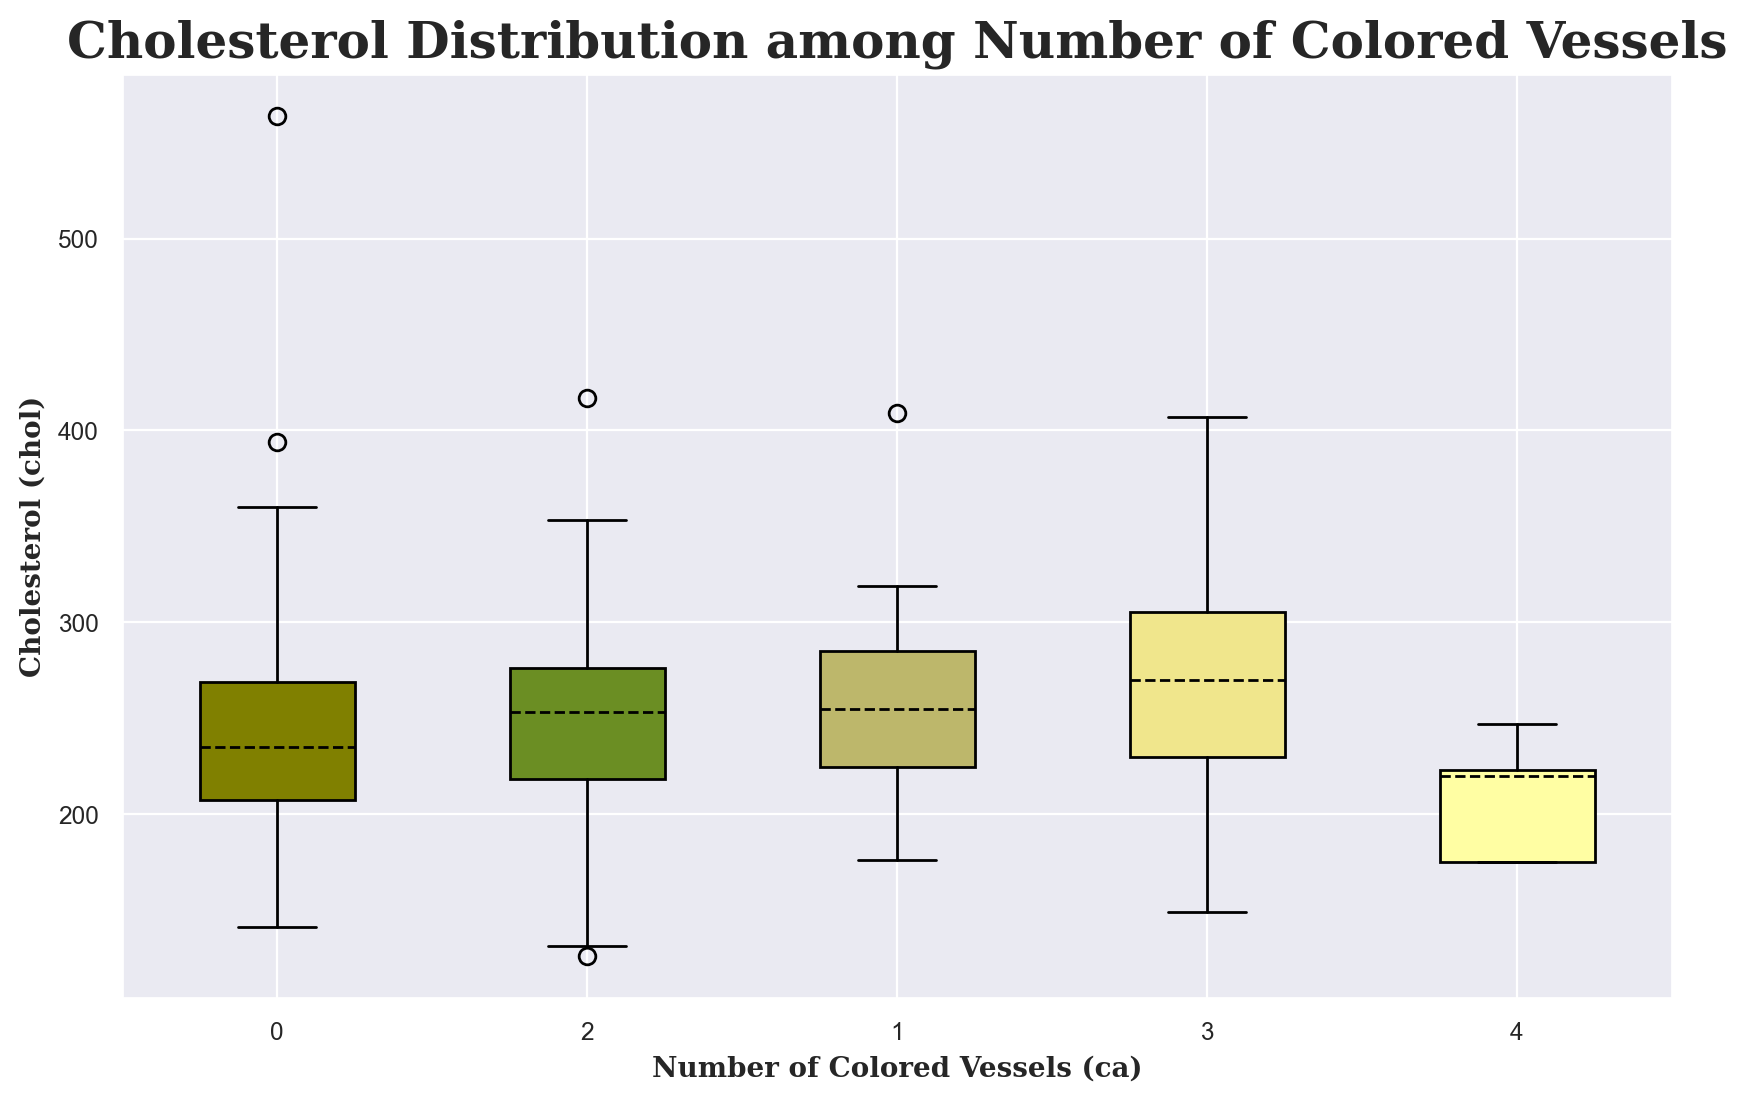

In [888]:
plt.figure(figsize=(10,6),dpi=200)
df_chol=[group["chol"].values for name , group in df.groupby("ca")]
colors = [ "olive",'olivedrab','darkkhaki',"khaki",'y']

bplot=plt.boxplot(df_chol,labels=df["ca"].unique().astype(str),patch_artist=True,medianprops=dict(color="black",linestyle='--'))
for patch, color in zip(bplot["boxes"],colors):
    patch.set_facecolor(color)
    
plt.xlabel("Number of Colored Vessels (ca)",fontsize=10,fontweight="bold",fontfamily="serif")
plt.ylabel("Cholesterol (chol)",fontsize=10,fontweight="bold",fontfamily="serif")
plt.title("Cholesterol Distribution among Number of Colored Vessels",fontsize=18,fontweight="bold",fontfamily="serif")


plt.grid(True)
plt.show()

🧠🧠🧠🧠 Forth Step: Acessing Heart disease status with focusing on Cholesterol and FBS level in different Ages.

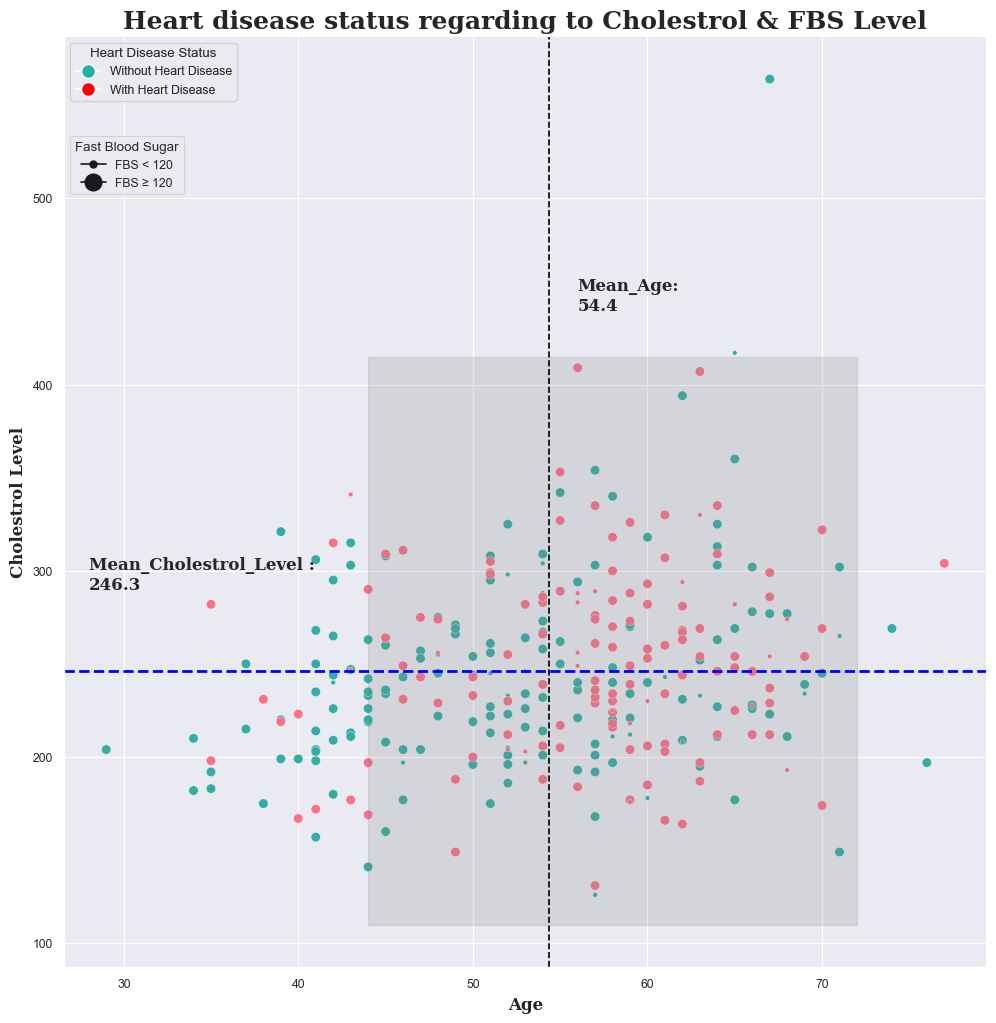

In [841]:
Mean_Cholestrol_Level=df["chol"].mean()
Mean_Age=df["age"].mean()
plot=sns.relplot(x="age",y="chol",size="fbs",hue="target",palette="husl",alpha=1,data=df,height=10,aspect=10/10,s=200,legend=False)
ax = plot.ax

legend_elements_hue = [
    Line2D([0], [0], marker='o', color='w', label='Without Heart Disease', markerfacecolor='lightseagreen',
            markersize=10),
    Line2D([0], [0], marker='o', color='w', label='With Heart Disease', markerfacecolor='red',
          markersize=10)
]
ax.legend(handles=legend_elements_hue, title='Heart Disease Status', loc='upper left')

legend_elements_size = [
    Line2D([0], [0], marker='o', color='k', label='FBS < 120', markersize=5),
    Line2D([0], [0], marker='o', color='k', label='FBS ≥ 120', markersize=12)
]

ax.legend(handles=legend_elements_size, title='Fast Blood Sugar', loc='upper left')

first_legend = ax.legend(handles=legend_elements_hue, title='Heart Disease Status', loc='upper left',bbox_to_anchor=(0, 1),
    frameon=True)
ax.add_artist(first_legend) 
second_legend = ax.legend(handles=legend_elements_size, title='Fast Blood Sugar', loc='upper left',bbox_to_anchor=(0, 0.90),
    frameon=True)
ax.add_artist(first_legend)



plt.axvline(x=Mean_Age,color="black",linestyle='--')
plt.text(56,440,f"Mean_Age:\n{Mean_Age:0.1f}",fontsize=12,fontfamily="serif",fontweight="bold")
plt.axhline(y=Mean_Cholestrol_Level,color="blue",lw=2,linestyle='--')
plt.text(28,290,f"Mean_Cholestrol_Level :\n{Mean_Cholestrol_Level:0.1f}",fontsize=12,fontfamily="serif",fontweight="bold")
ax.fill_betweenx(
    y=[110, 415],     
    x1=44, x2=72,    
    color="grey",
    alpha=0.2
)
          
ax.set_title("Heart disease status regarding to Cholestrol & FBS Level", fontsize=18, fontweight="bold", fontfamily="serif")
ax.set_xlabel("Age", fontsize=12, fontweight="bold", fontfamily="serif")
ax.set_ylabel("Cholestrol Level", fontsize=12, fontweight="bold", fontfamily="serif")

plt.show()

🧠🧠🧠🧠🧠 Fifth Step: 
Comparison of cases with and without Exercise-induced Angina in terms of their Max Heart Rate in Stress Test.

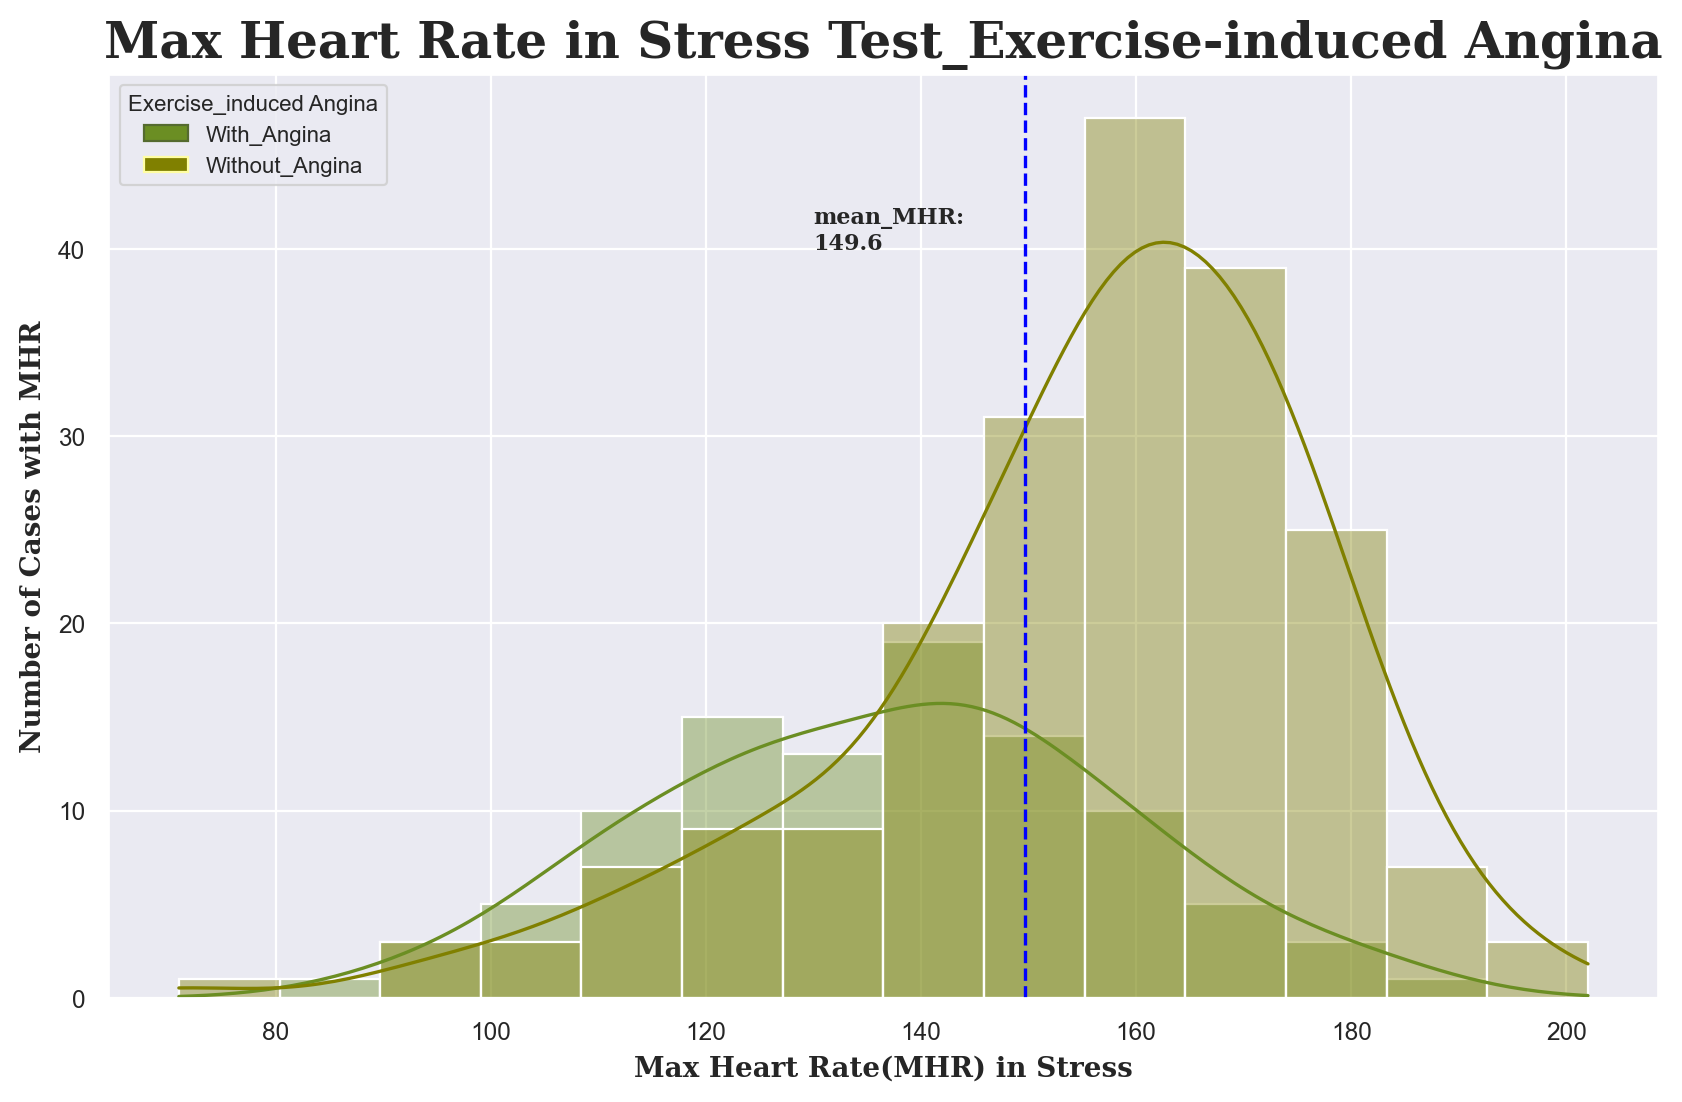

In [843]:
mean_MHR=df["thalach"].mean()
custom_colors = ["olive",'olivedrab']      
sns.set_palette(custom_colors)

plt.figure(figsize=(10,6),dpi=200)
ax=sns.histplot(data=df,x="thalach", hue="exang", kde=True,alpha=0.4,legend=False)

bar_colors = sns.color_palette()[:2]  
custom_handles = [
    Patch(facecolor=bar_colors[1], edgecolor='darkolivegreen'),
    Patch(facecolor=bar_colors[0], edgecolor='y')
]
ax.legend(custom_handles,
          ["With_Angina", "Without_Angina"],
          title="Exercise_induced Angina",
          loc="upper left",
          fontsize=8,
          title_fontsize=8)


plt.axvline(mean_MHR,color="blue",linestyle='--')
plt.text(130,40,f"mean_MHR:\n{mean_MHR:0.1f}",fontsize=8,fontfamily="serif",fontweight="bold")


plt.title("Max Heart Rate in Stress Test_Exercise-induced Angina",fontsize=18,fontfamily="serif",fontweight="bold")
plt.xlabel("Max Heart Rate(MHR) in Stress",fontsize=10,fontfamily="serif",fontweight="bold")
plt.ylabel("Number of Cases with MHR",fontsize=10,fontfamily="serif",fontweight="bold")
plt.show()

🧠🧠🧠🧠🧠🧠 Sixth Step: 

Evaluating the Heart disease status regarding 2 important factors: 

1) Resting ECG Results 
2) Max Heart Rate achieved during a stress test

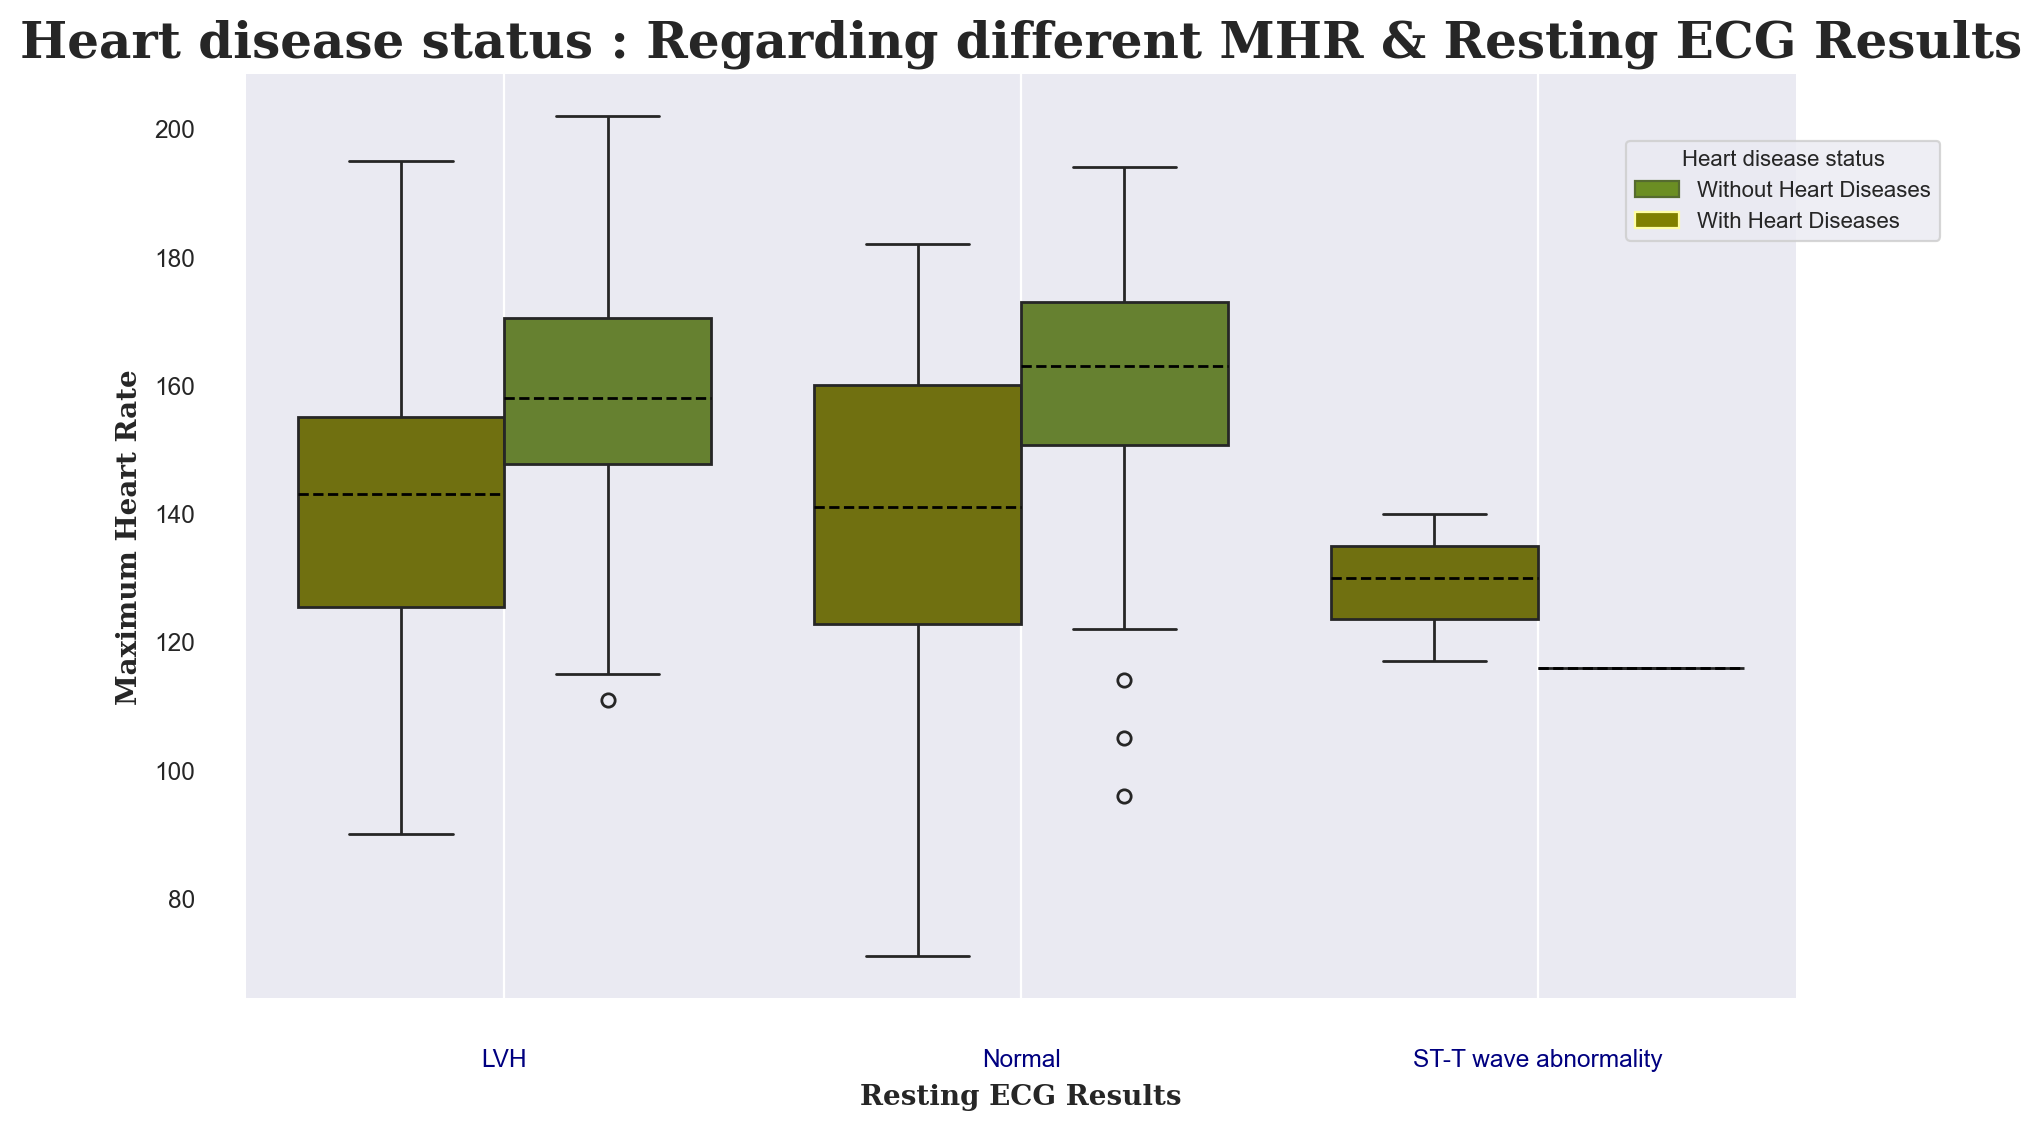

In [845]:
plt.figure(figsize=(10,6),dpi=200)

ax=sns.boxplot(x="restecg",y="thalach",hue="target",data=df,medianprops=dict(color="black",linestyle='--'))
sns.despine(offset=10, trim=True)

ax.legend(custom_handles,
          ["Without Heart Diseases","With Heart Diseases"],
          title="Heart disease status",
          loc="upper right",bbox_to_anchor=(1.1, 0.94),
          fontsize=8,
          title_fontsize=8)

plt.title("Heart disease status : Regarding different MHR & Resting ECG Results",fontsize=18,fontfamily="serif",fontweight="bold")
plt.xlabel("Resting ECG Results",fontsize=10,fontfamily="serif",fontweight="bold")
plt.ylabel("Maximum Heart Rate",fontsize=10,fontfamily="serif",fontweight="bold")

ax.set_xticks([0, 1, 2])
ax.set_xticklabels(["LVH", "Normal", "ST-T wave abnormality"],color="navy")

plt.grid()
plt.show()


🧠🧠🧠🧠🧠🧠🧠 Seventh Step: Evaluation of Visible Vessels based on the Thalium Stress Test Results.

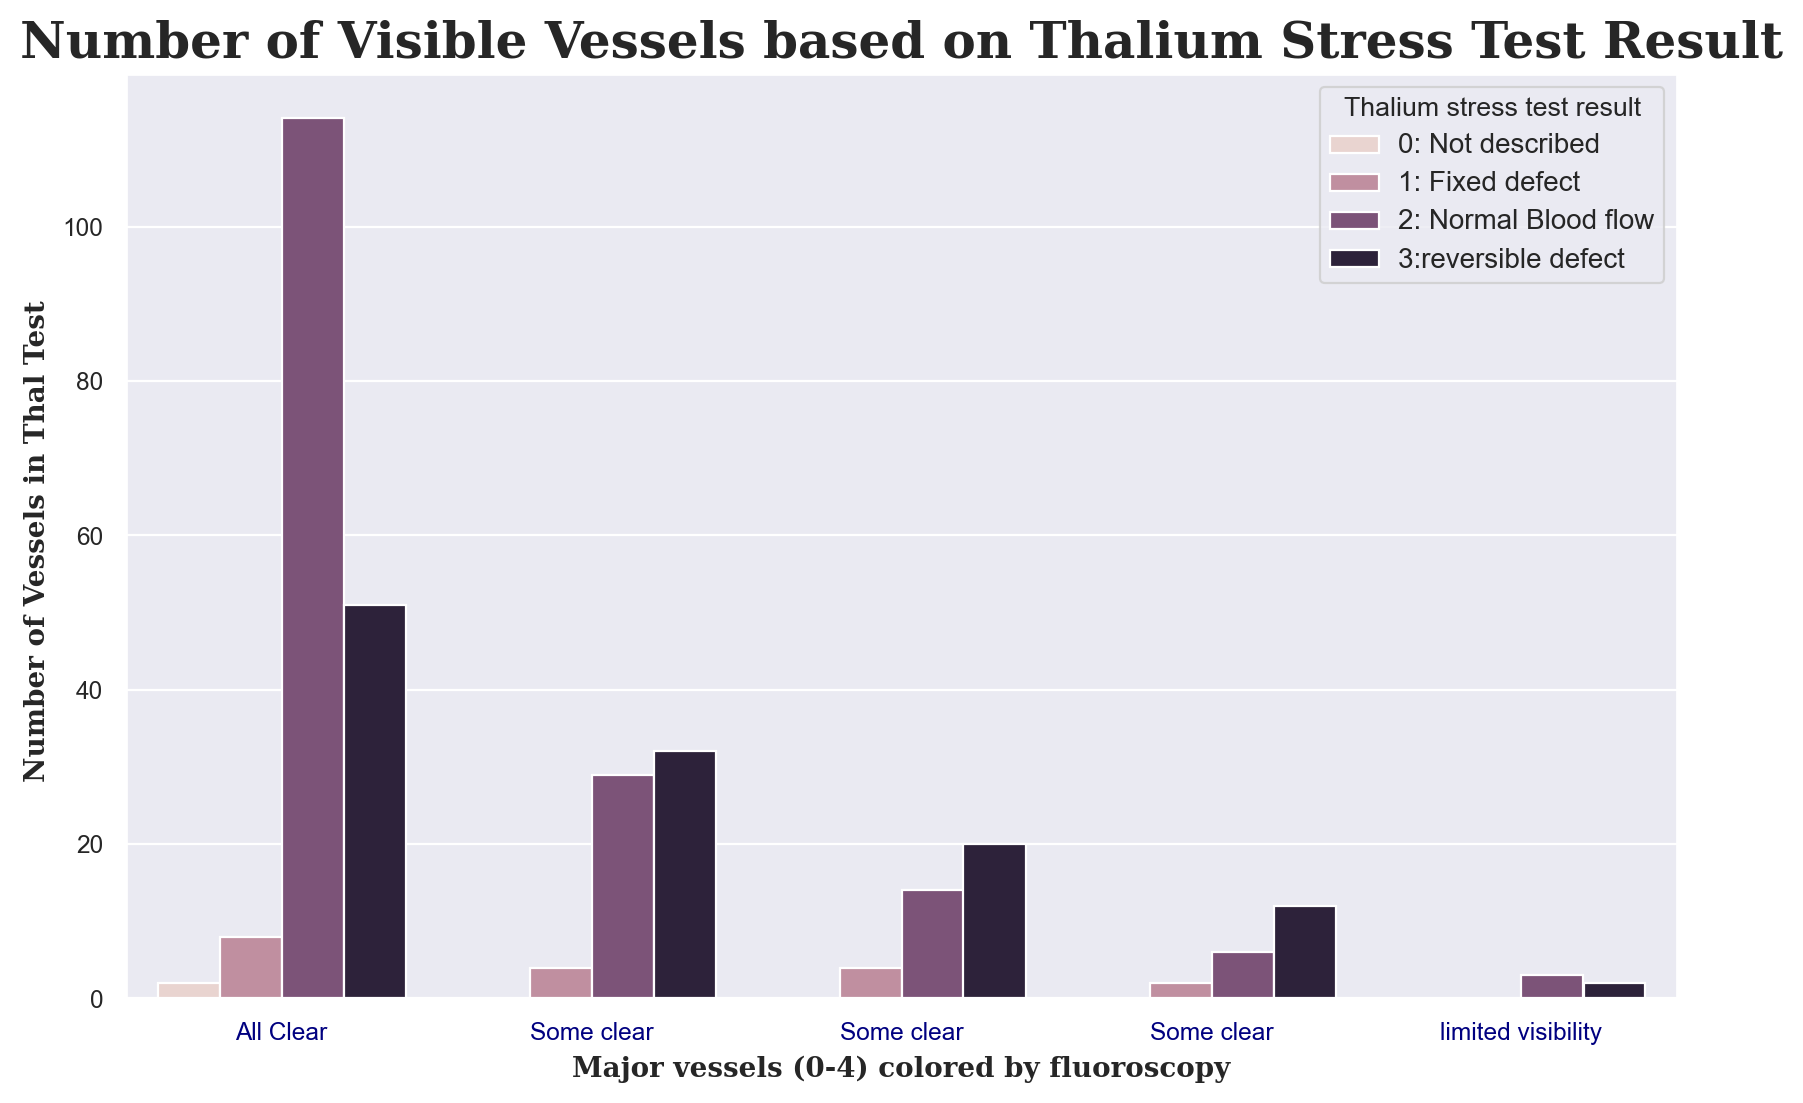

In [847]:
plt.figure(figsize=(10,6),dpi=200)
ax=sns.countplot(x="ca",hue="thal",data=df)

legend=plt.legend(title="Thalium stress test result")
new_label=["0: Not described","1: Fixed defect","2: Normal Blood flow","3:reversible defect"]
for text, label in zip(legend.get_texts(),new_label):
    text.set_fontsize(10)
    text.set_text(label)

plt.title("Number of Visible Vessels based on Thalium Stress Test Result",fontsize=18,fontfamily="serif",fontweight="bold")
plt.xlabel("Major vessels (0-4) colored by fluoroscopy",fontsize=10,fontfamily="serif",fontweight="bold")
plt.ylabel("Number of Vessels in Thal Test ",fontsize=10,fontfamily="serif",fontweight="bold")
ax.set_xticks([0,1,2,3,4])
ax.set_xticklabels(["All Clear","Some clear","Some clear","Some clear","limited visibility"],color="navy")
    
plt.show()

🧠🧠🧠🧠🧠🧠🧠🧠 8th Step: 
Evaluation of  ST depression in different types of peak exercise ST segment slope  considering the presence of heart diseases.

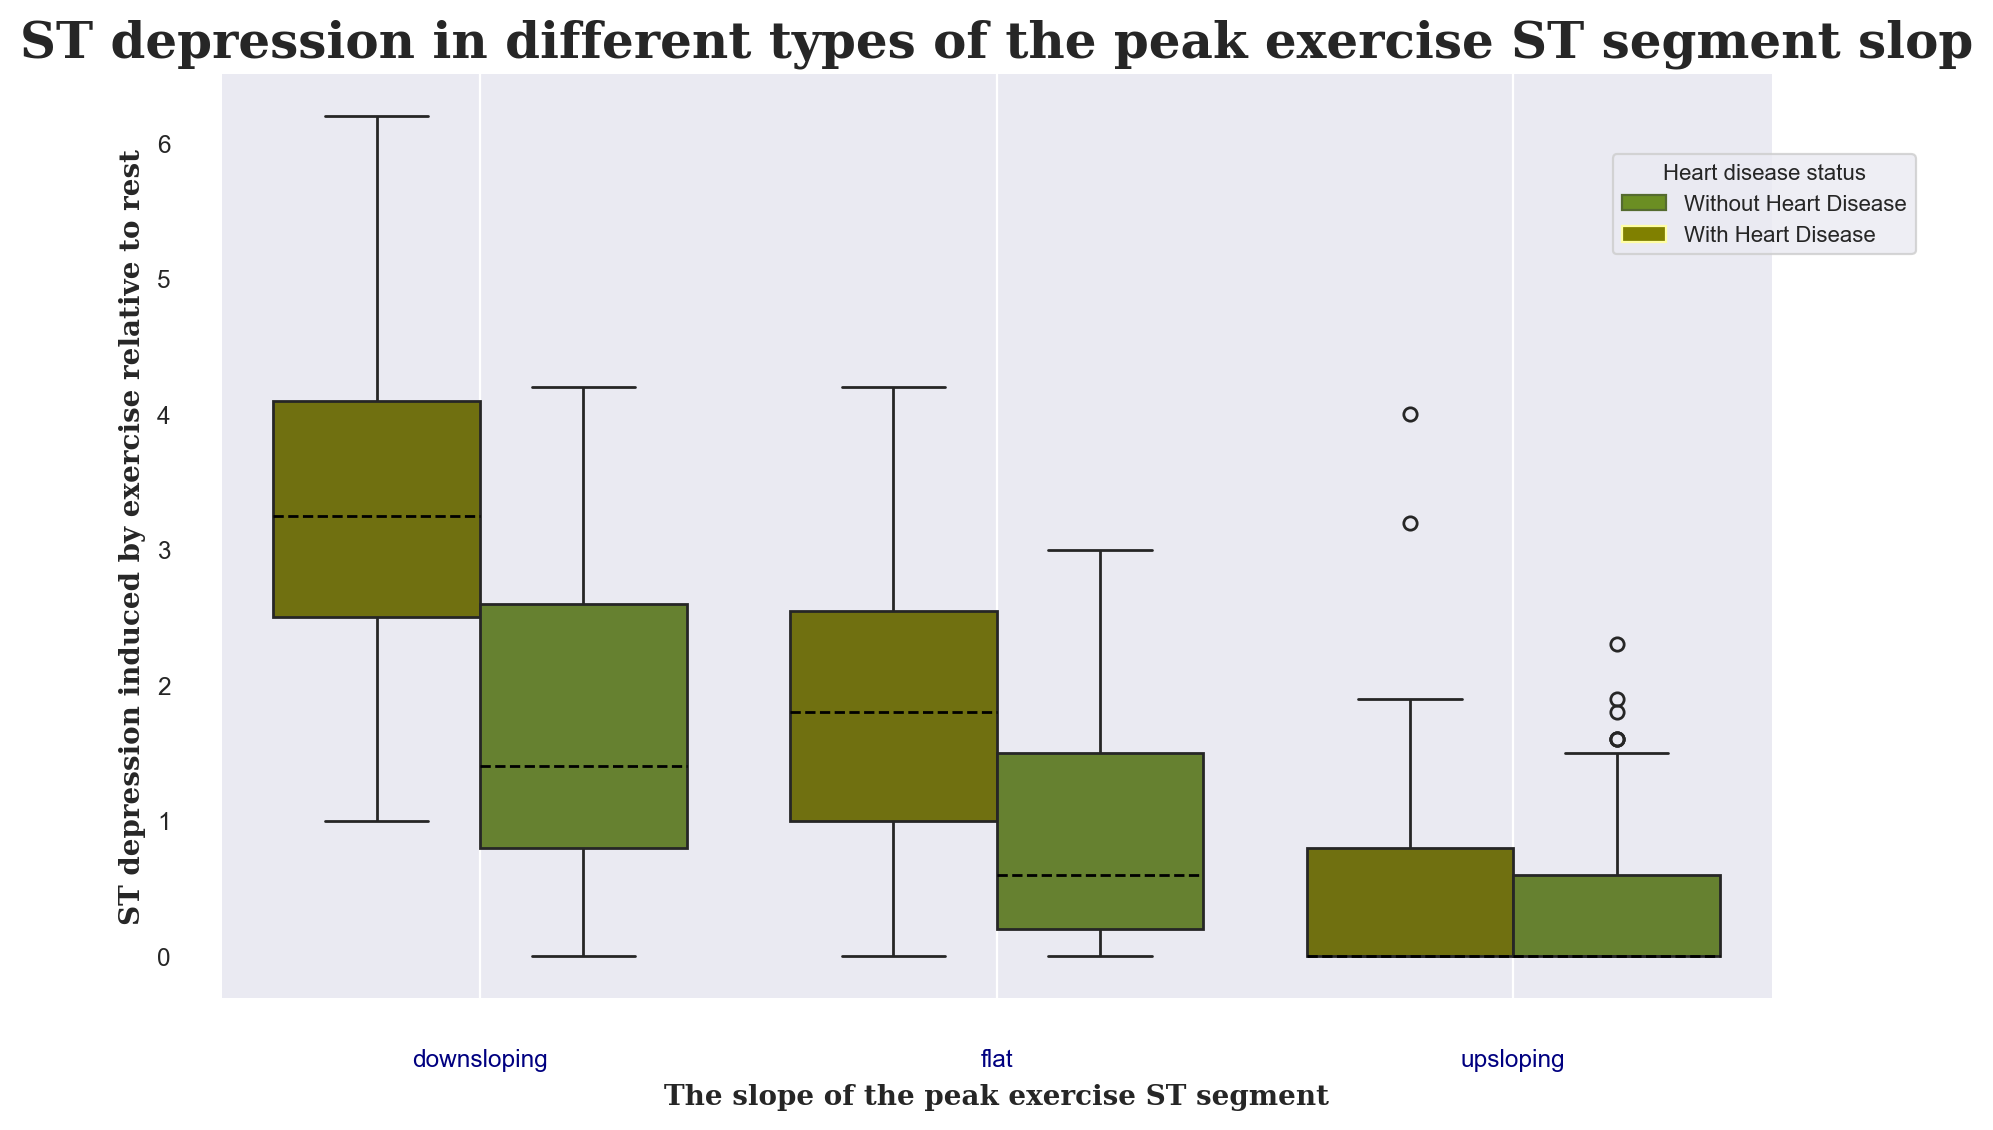

In [849]:
plt.figure(figsize=(10,6),dpi=200)
ax=sns.boxplot(x="slope",y="oldpeak",hue="target",data=df,medianprops=dict(color="black",linestyle='--'))
ax.legend(custom_handles,["Without Heart Disease","With Heart Disease"],title="Heart disease status",loc="upper right",bbox_to_anchor=(1.1,0.925),
       fontsize=8,title_fontsize=8)
sns.despine(offset=10, trim=True)
plt.xlabel("The slope of the peak exercise ST segment",fontsize=10,fontfamily="serif",fontweight="bold")
plt.ylabel("ST depression induced by exercise relative to rest",fontsize=10,fontfamily="serif",fontweight="bold")
plt.title("ST depression in different types of the peak exercise ST segment slop",fontsize=18,fontfamily="serif",fontweight="bold")

ax.set_xticks([0,1,2])
ax.set_xticklabels(["downsloping","flat","upsloping"],color="navy")
plt.grid()
plt.show()

🧠🧠🧠🧠🧠🧠🧠🧠🧠9th Step: Evaluating of Cholesterol Level And BP Behaviour  in different Heart disease status.

<Figure size 2000x1200 with 0 Axes>

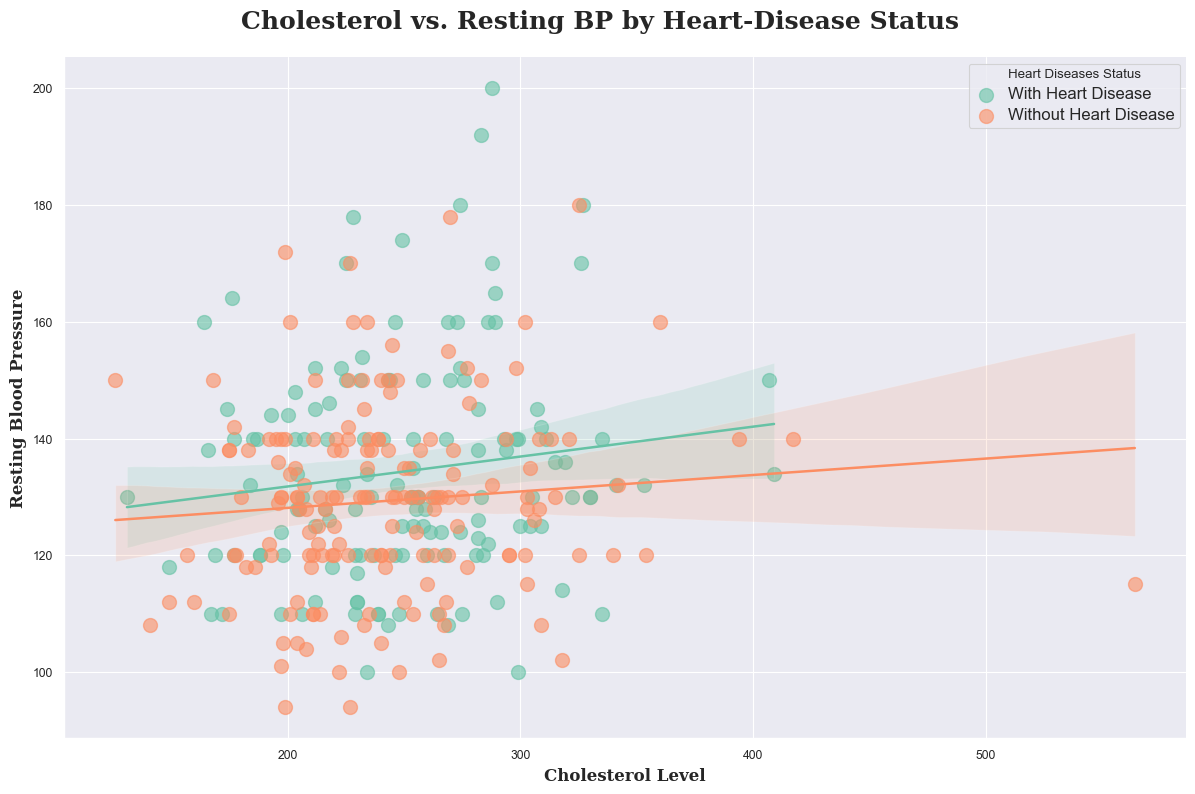

In [851]:
sns.set_theme(context="paper", palette="Set2")

plt.figure(figsize=(10,6),dpi=200)

g = sns.lmplot(
    data=df,
    x="chol", y="trestbps", hue="target",
    scatter_kws=dict(alpha=.6,s=100),height=8, aspect=12/8,legend=False)

legend=plt.legend(title="Heart Diseases Status")
New_Label=["With Heart Disease","Without Heart Disease"]
for text, label in zip(legend.get_texts(),New_Label):
    text.set_fontsize(12)
    text.set_text(label)

g.fig.suptitle("Cholesterol vs. Resting BP by Heart‑Disease Status",fontsize=18,fontfamily="serif",fontweight="bold")
g.fig.subplots_adjust(top=0.92) 
g.set_axis_labels("Cholesterol Level","Resting Blood Pressure",fontsize=12,fontfamily="serif",fontweight="bold")
plt.show()

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠10th Step: Evaluating of Heart disease status with Maximum heart rate achieved during a stress test.

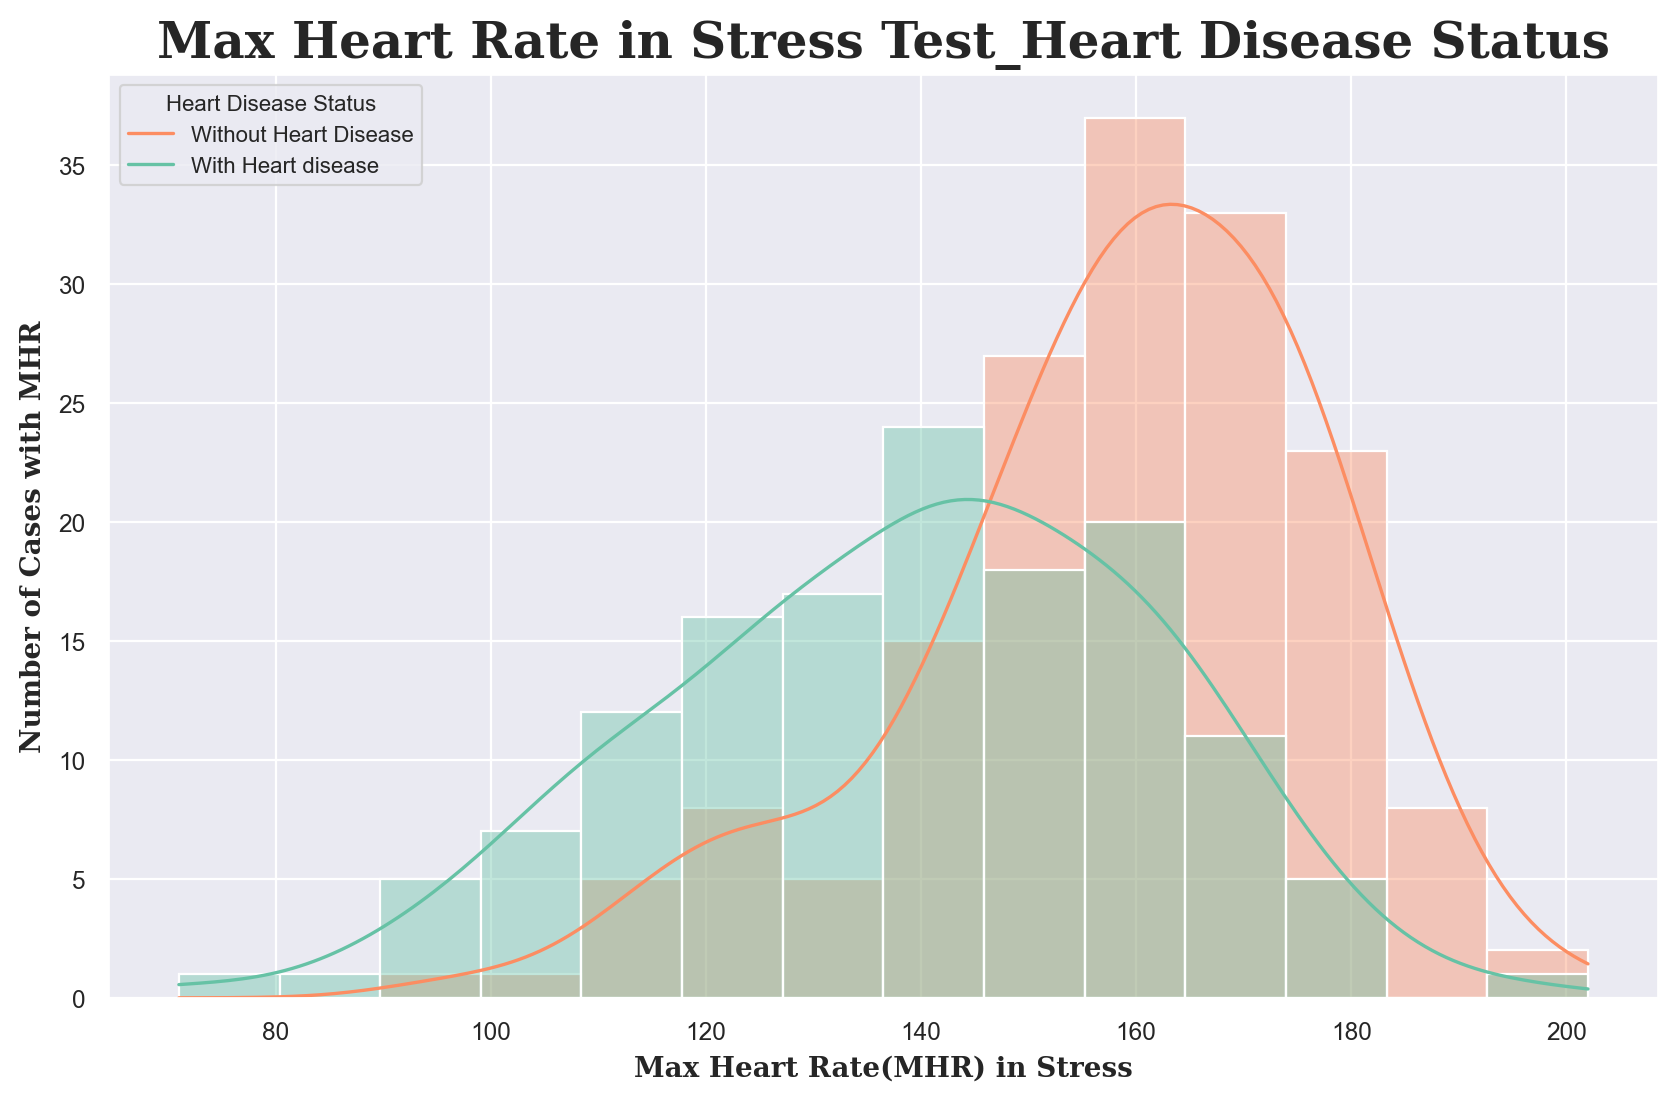

In [853]:
plt.figure(figsize=(10,6),dpi=200)
ax=sns.histplot(data=df,x="thalach", hue="target", kde=True,alpha=0.4,legend=False)
ax.legend(
          ["Without Heart Disease", "With Heart disease"],
          title="Heart Disease Status",
          loc="upper left",
          fontsize=8,
          title_fontsize=8)
plt.title("Max Heart Rate in Stress Test_Heart Disease Status",fontsize=18,fontfamily="serif",fontweight="bold")
plt.xlabel("Max Heart Rate(MHR) in Stress",fontsize=10,fontfamily="serif",fontweight="bold")
plt.ylabel("Number of Cases with MHR",fontsize=10,fontfamily="serif",fontweight="bold")

plt.show()

🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠🧠11th Step:
Evaluating of Heart disease status considering Maximum heart rate achieved during a stress test & ST depression induced by exercise relative to rest.

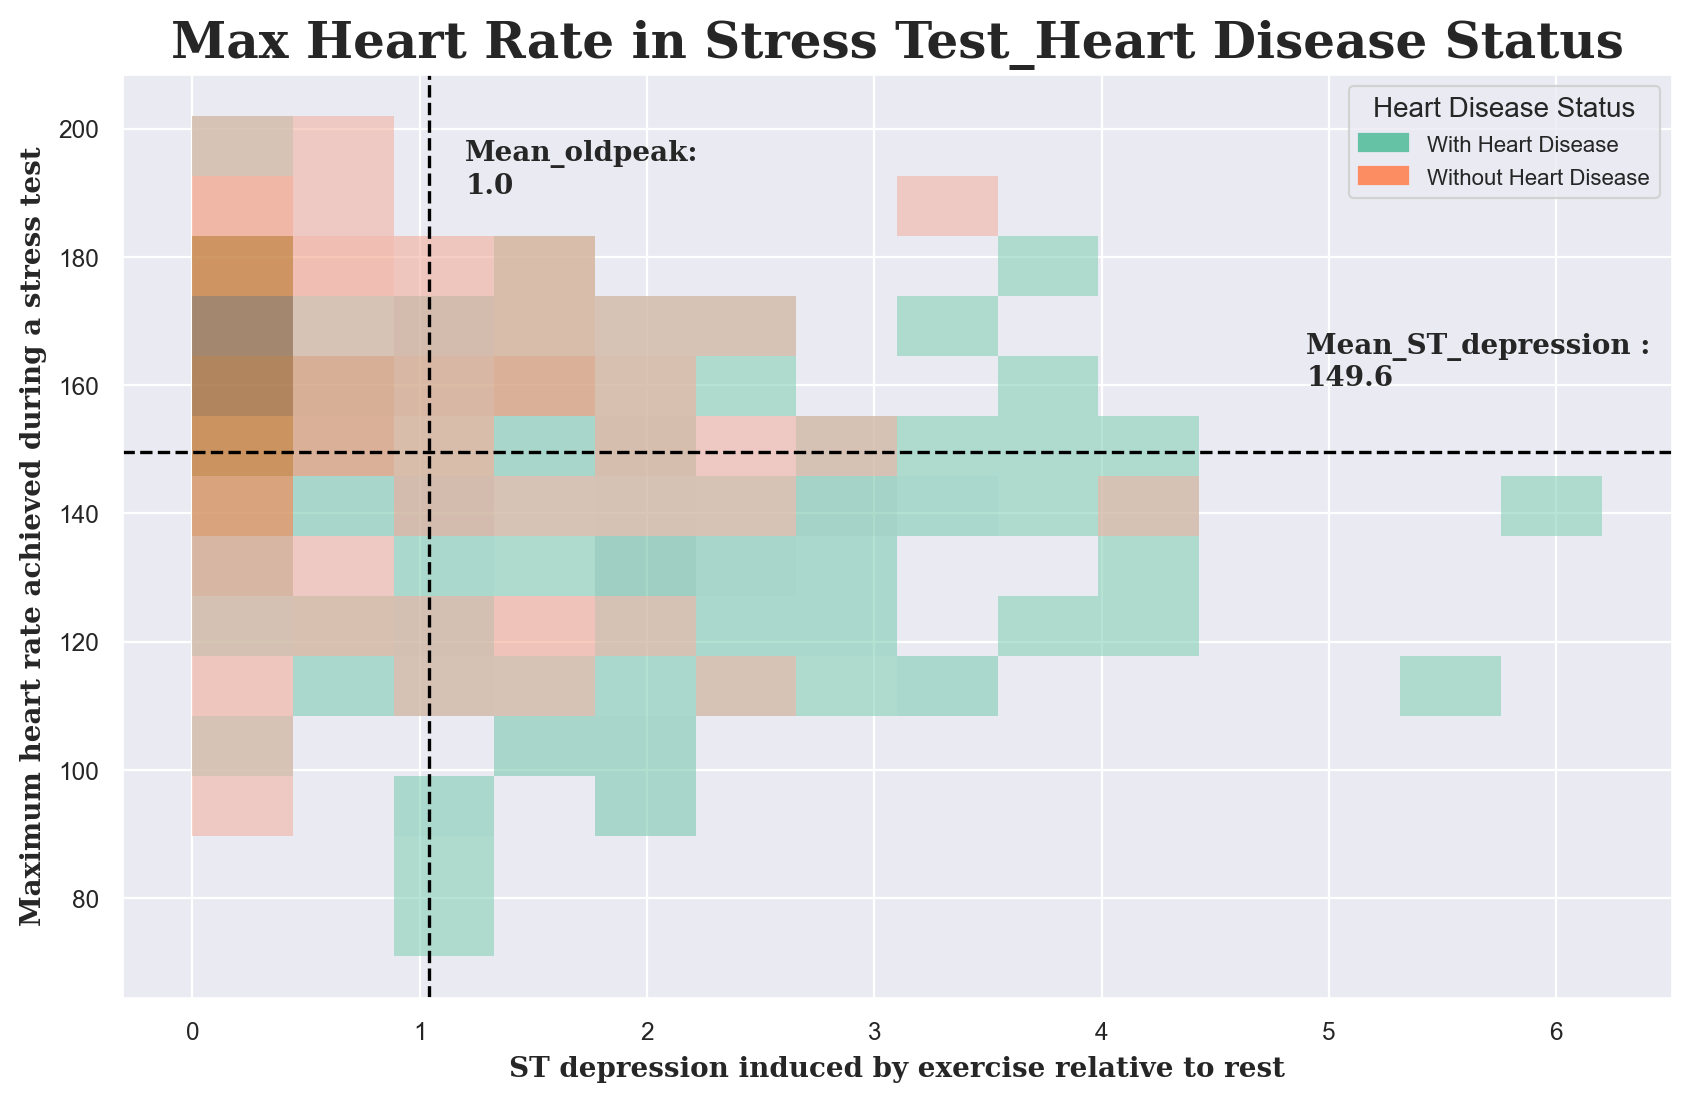

In [855]:
plt.figure(figsize=(10,6),dpi=200)
ax=sns.histplot(data=df, x="oldpeak", y="thalach", hue="target",alpha=0.6)


legend = ax.legend_
for text, new_label in zip(legend.get_texts(),
                           ["With Heart Disease", "Without Heart Disease"]):
    text.set_text(new_label)
    text.set_fontsize(8)
legend.set_title("Heart Disease Status")
legend.get_title().set_fontsize(10)
    
Mean_oldpeak=df["oldpeak"].mean()
Mean_ST_depression=df["thalach"].mean()
plt.axvline(x=Mean_oldpeak,color="black",linestyle='--')
plt.text(1.2,190,f"Mean_oldpeak:\n{Mean_oldpeak:0.1f}",fontsize=10,fontfamily="serif",fontweight="bold")

plt.axhline(y=Mean_thalach,color="black",linestyle='--')
plt.text(4.9,160,f"Mean_ST_depression :\n{Mean_ST_depression:0.1f}",fontsize=10,fontfamily="serif",fontweight="bold")


plt.title("Max Heart Rate in Stress Test_Heart Disease Status",fontsize=18,fontfamily="serif",fontweight="bold")
plt.xlabel("ST depression induced by exercise relative to rest",fontsize=10,fontfamily="serif",fontweight="bold")
plt.ylabel("Maximum heart rate achieved during a stress test",fontsize=10,fontfamily="serif",fontweight="bold")

plt.show()